# Regression Analysis

In this notebook we will see how regression analysis can help to understand the data behavior, to predict data values
(continuous or discrete), and to find important predictors (sparse models).
We present four different regression models: Simple linear regression, Multiple linear regression, Polynomial regression and Logistic regression. 
We evaluate the analysis results qualitatively by means of Seaborn visualization tools and quantitatively by means Scikit-learn library, which provides validation measures, and other toolboxes.
We use different real data sets:
* Longley dataset of US macroeconomic data
* Prediction of the Price of a New Housing Data Market
* Sea Ice Extent and Climate Change
* Diabetes Scikit-learn dataset
* Advertising dataset
* Winning or Losing Football Team

### Contents of the notebook:

- Simple and Multiple Linear Regression and Ordinary Least Squares
- Polynomial regression 
- Visualization (Seaborn)
- Prediction (Scikit-learn)
- Sparse models 
- Logistic Regresion
- Statistics (StatsModel)

## How to make predictions about real-world quantities.

+  How does sales volume change with changes in price? How is it affected by weather?
+  How does affect the title of a book to sales?
+  How does the amount of a drug absorbed vary with body weight of patient? Does it depend on blood pressure?
+  How many customers can I expect today?
+  At what time should I go home to avoid the traffic jam?
+  What is the chance of rain for next two Mondays? What is the expected temperature?

<center><img src="files/images/crystal_ball_s.jpg"></center>

### Example: Connected Car.
#### How to Beat the Traffic. Driving the Future of Smart Cities.

Car as a sensor with information feedback.

Possible Data Science Use-Cases:
+ Predictive Car Maintenance (predict part failure, optimize replacement schedule).
+ Leveraging Driving Behavior (differenciate insurance pricing, optimize car design).
+ Improving GPS Systems (establish baseline for traffic congestion, create meaningful metrics for routing).
+ Predictive Power for Assistance Systems (optimize fuel efficiency, predict start/stops/braking in the next two minutes)
+ Traffic Light Assistance (signal timing of traffic lights, crowd sourcing of traffic lights).

<small>([Source](http://www.slideshare.net/ihuston/driving-the-future-of-smart-cities-how-to-beat-the-traffic-pivotal-talk-at-strata-2014))</small>

In [128]:
# Settings
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2,'font.family': [u'times']})


import matplotlib.pylab as plt
%matplotlib inline 
#plt.style.use('seaborn-whitegrid')
plt.rc('text', usetex=True)
plt.rc('font', family='times')
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 
plt.rc('font', size=12) 
plt.rc('figure', figsize = (12, 5))

In [129]:
import numpy as np

### Notation

$x_i$ element of a vector, $\textbf{x}$ column vector, $\textbf{x'}$ (transpose of $\textbf{x}$) row vector, $X$ matrix.

### From Data to Models

All these questions have a common structure: we are asking about one variable $\textbf{y}$ (*response*) that can be expressed as a combination of one or more (independent) variables $\textbf{x}_i$ (commonly called *covariates* or *predictors*).

The role of regression is to build a model (formula) to predict the response from the covariates.

## Linear Model

The simplest model we can think of is the **linear model**, where the response $\textbf{y}$ depends linearly from the covariates $\textbf{x}_i$:

$$ \textbf{y}  =  a_1 \textbf{x}_1  + \dots + a_m \textbf{x}_{m} $$

The $a_i$ are termed the *parameters* of the model or the coefficients.

This equation can be rewritten in a more compact form as

$$ \textbf{y}  = X \textbf{w}$$

where $$ \textbf{y} = \left( \begin{array}{c} y_1 \\ y_2 \\ \vdots \\ y_n \end{array} \right), 
 X = \left( \begin{array}{c} x_{11}  \dots x_{1m} \\ x_{21}  \dots x_{2m}\\ \vdots \\ x_{n1}  \dots x_{nm} \end{array} \right),
 \textbf{w} = \left( \begin{array}{c} a_1 \\ a_2 \\ \vdots \\ a_m \end{array} \right) $$
 
 **Linear regression** is the technique for creating linear models.
 
In the **simple** linear regression, with a single variable, we described the relationship between the predictor and the response with a straight line. 

The model is:
$$ \textbf{y}  =  a_0+ a_1 \textbf{x}_1 $$

The parameter $a_0$ is called the constant term or the *intercept*.

**Example**: Does the insurance price depend on the driving experience?
Given the following information, the monthly auto insurance prices ($\textbf{y}$) and driving experiences in years ($\textbf{x}_{1}$) of a set of n subjects, we can build a linear model to answer this question.
We can also predict the monthly auto insurance price for a driver with 10 years of driving experience.


## Linear Regression 


Let's generate a set of data to illsutrate simple linear regression

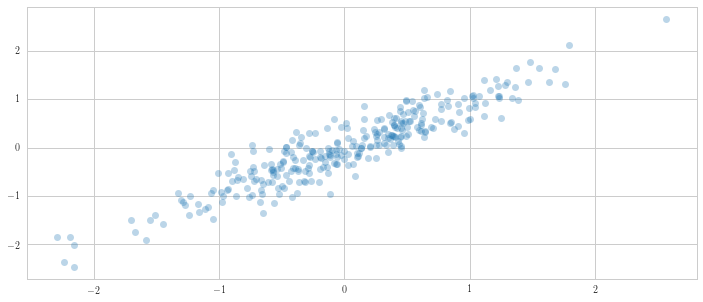

In [130]:
X1 = np.random.randn(300, 2)  # Random floats sampled from a univariate “normal” (Gaussian) distribution
A = np.array([[0.6, .4], [.4, 0.6]])
X2 = np.dot(X1, A)
plt.plot(X2[:, 0], X2[:, 1], "o", alpha=0.3) # alpha, blending value, between 0 (transparent) and 1 (opaque).

We can create a linear model to explain the data

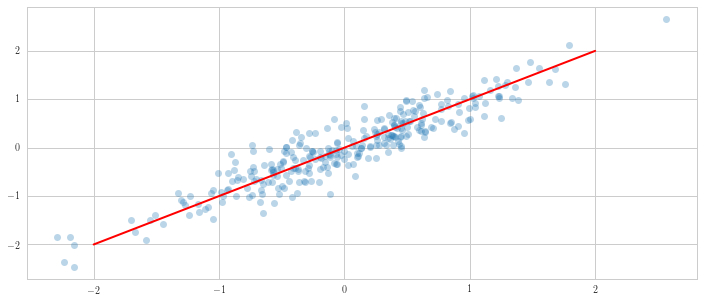

In [131]:
model=[0+1*x for x in np.arange(-2,3)]
plt.plot(X2[:, 0], X2[:, 1], "o", alpha=0.3);
plt.plot(np.arange(-2,3), model,'r');
plt.show()
# The red line gives the predicted values of this model

But there are other linear models. 


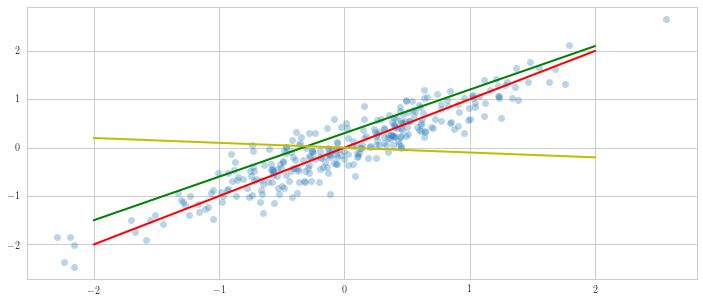

In [132]:
plt.plot(X2[:, 0], X2[:, 1], "o", alpha=0.3);
# We can use several parameters and we do not know which is the best model
model1=[0+1*x for x in np.arange(-2,3)]
model2=[0.3+0.9*x for x in np.arange(-2,3)]
model3=[0-0.1*x for x in np.arange(-2,3)]
plt.plot(np.arange(-2,3), model1,'r')
plt.plot(np.arange(-2,3), model2,'g')
plt.plot(np.arange(-2,3), model3,'y')


#### Which is the best model for a set of samples?


## Ordinary Least Squares

$$\textbf{y} = a_0+a_1 \textbf{x}$$

Ordinary Least Squares (OLS) is the simplest and most common **estimator** in which the two $a$'s are chosen to minimize the **square of the distance between the predicted values and the actual values**. 

Given the set of samples $(\textbf{x},\textbf{y})$, the objective is to minimize:

$$ ||a_0 + a_1 \textbf{x} -  \textbf{y} ||^2_2 = \sum_{j=1}^n (a_0+a_1 x_{j} -  y_j )^2,$$ with respect to $a_0, a_1$.

This expression is often called **sum of squared errors of prediction (SSE)**.

## How to compute the OLS: Scipy.optimize

In [133]:
# To illustrate
zip([2,3,4,5,6],[40,50,60,70,80])

Optimization terminated successfully.
         Current function value: 21.375000
         Iterations: 79
         Function evaluations: 153


(0, 20)

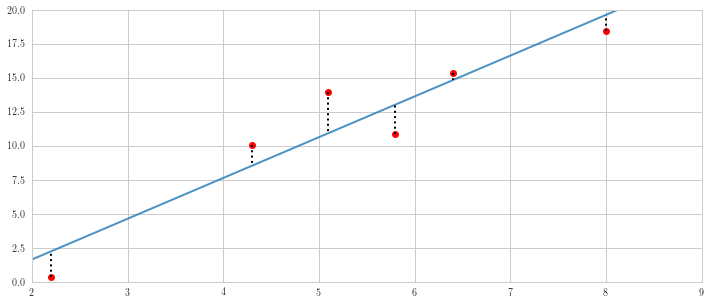

In [134]:
from scipy.optimize import fmin

x = np.array([2.2, 4.3, 5.1, 5.8, 6.4, 8.0])
y = np.array([0.4, 10.1, 14.0, 10.9, 15.4, 18.5])
 
# Minimize the sum of squares using a lambda function

b0,b1 = fmin(lambda theta, x, y: np.sum((y - theta[0] - theta[1]*x) ** 2), [0,1], args=(x,y)); 

plt.plot(x, y, 'ro')
plt.plot([0,10], [b0, b0+b1*10], alpha=0.8) # Add the regression line, colored in blue
for xi, yi in zip(x,y):
    plt.plot([xi]*2, [yi, b0+b1*xi], "k:")
plt.xlim(2, 9); plt.ylim(0, 20)

We can minimize other criteria, such as the **sum of absolute differences between the predicted values and the actual values**. 

Optimization terminated successfully.
         Current function value: 10.162463
         Iterations: 39
         Function evaluations: 77


(0, 20)

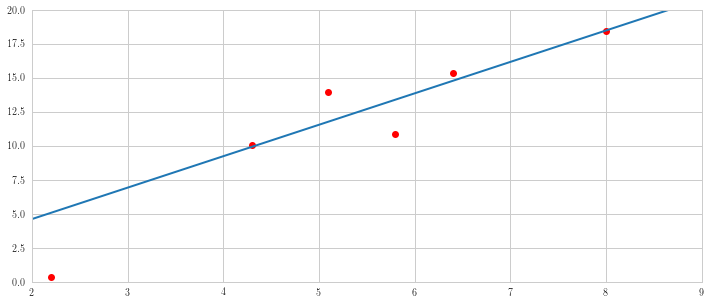

In [135]:
sabs = lambda theta, x, y: np.sum(np.abs(y - theta[0] - theta[1]*x))
b0,b1 = fmin(sabs, [0,1], args=(x,y))   # minimize the sum of absolute differences
plt.plot(x, y, 'ro')
plt.plot([0,10], [b0, b0+b1*10]) # Add the regression line, colored in blue
plt.xlim(2, 9); plt.ylim(0, 20)

OLS is a popular approach for several reasons. 

+ For one, it is computationally cheap to calculate the coefficients. 
+ It is also easier to interpret than more sophisticated models, and in situations where the goal is understanding a simple model in detail, rather than estimating the response well, they can provide insight into what the model captures. 
+ Finally, in situations where there is a lot of noise, it may be hard to find the true functional form, so a constrained model can perform quite well compared to a complex model which is more affected by noise.

The resulting model is represented as follows:

$$\hat{\textbf{y}} = \hat{a}_0+\hat{a}_1 \textbf{x}$$

Here the hats on the variables represent the fact that they are estimated from the data we have available.

## Linear Regression Visualization: Seaborn

The ``lmplot()`` function from the Seaborn module is intended for exploring linear relationships of different forms in multidimensional datesets. Input data must be in a Pandas ``DataFrame``. To plot, provide the predictor and response variable names along with the dataset

### Example 1:  Macroeconomic dataset

To start with we load the Longley dataset of US macroeconomic data from the R datasets website.

In [136]:
import pandas as pd

df = pd.read_csv('http://vincentarelbundock.github.io/Rdatasets/csv/datasets/longley.csv', index_col=0)
df.head()

,GNP.deflator,GNP,Unemployed,Armed.Forces,Population,Year,Employed
1947,83.0,234.289,235.6,159.0,107.608,1947,60.323
1948,88.5,259.426,232.5,145.6,108.632,1948,61.122
1949,88.2,258.054,368.2,161.6,109.773,1949,60.171
1950,89.5,284.599,335.1,165.0,110.929,1950,61.187
1951,96.2,328.975,209.9,309.9,112.075,1951,63.221


Macroeconomic data from 1947 to 1962.

We will use the variable Total Derived Employment ('Employed') as our response $\textbf{y}$ and Gross National Product ('GNP') as our predictor $\textbf{x}$.

We take the single response variable $\textbf{y}$ and store it separately. 

We also add a constant term so that we fit the intercept of our linear model: $X=(\textbf{1},\textbf{x})$

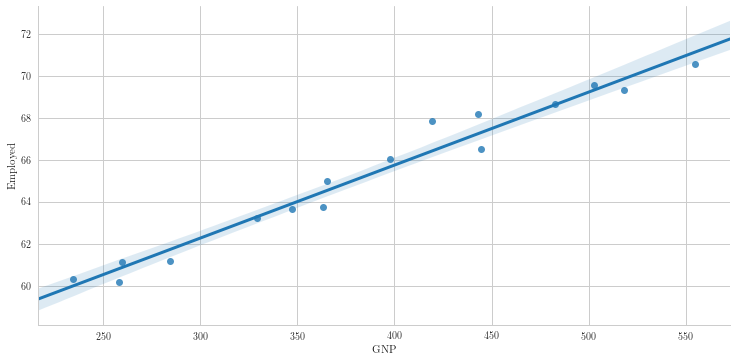

In [137]:
sns.lmplot("GNP", "Employed", df, size=5.2,aspect=2)

This plot has two main components. 

+ The first is a scatterplot, showing the observed datapoints. 
+ The second is a regression line, showing the estimated linear model relating the two variables. Because the regression line is only an estimate, it is plotted with a 95% confidence band to give an impression of the certainty in the model.

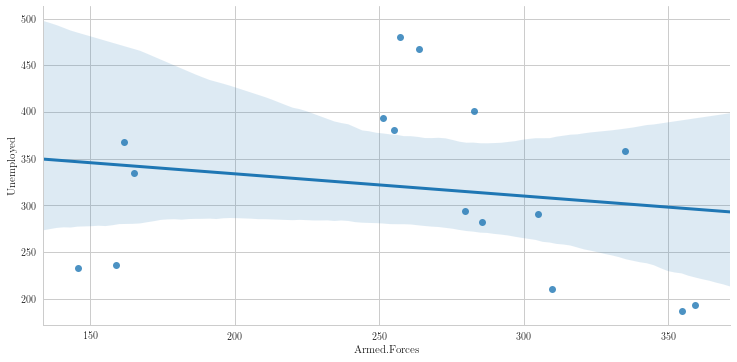

In [138]:
sns.lmplot("Armed.Forces", "Unemployed", df, size=5.2,aspect=2);

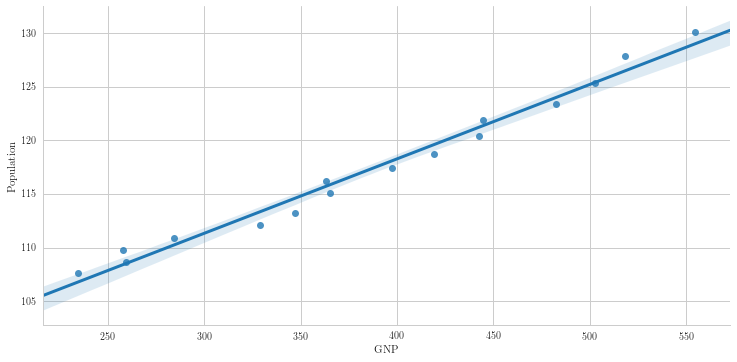

In [139]:
sns.lmplot("GNP", "Population", df, size=5.2,aspect=2);

## Multiple Regression and Polynomial Regression
In Ordinary Least Squares Regression with a single variable we described the relationship between the predictor and the response with a straight line. This case is called *simple* linear regression. In the case of *multiple* linear regression we extend this idea by fitting a m-dimensional hyperplane to our m predictors.

$$ \textbf{y} = a_1 \textbf{x}_1 + \dots + a_m \textbf{x}_m = X \textbf{w} $$


Despite its name, linear regression can be used to fit non-linear functions. A linear regression model is linear in the model parameters, not necessarily in the predictors. If you add non-linear transformations of your predictors to the linear regression model, the model will be non-linear in the predictors.

$$ \textbf{y} = a_1 \phi(\textbf{x}_1) + \dots + a_m \phi(\textbf{x}_m) $$

A very popular non-linear regression technique is *Polynomial Regression*, a technique which models the relationship between the response and the predictors as an n-th order polynomial. The higher the order of the polynomial the more "wigglier" functions you can fit. 

Using higher order polynomial comes at a price: **computational complexity** and **overfitting**. Overfitting refers to a situation in which the model fits the idiosyncrasies of the training data and loses the ability to generalize from the seen to predict the unseen.

To illustrate polynomial regression we will consider the Boston housing dataset. We'll look into the task to predict median house values in the Boston area using the predictor ``lstat``, defined as the "proportion of the adults without some high school education and proportion of male workes classified as laborers" (see *Hedonic House Prices and the Demand for Clean Air, Harrison & Rubinfeld, 1978*).

We can see that the relationship between ``medv`` and ``lstat`` is non-linear: the straight line is a poor fit; a better fit can be obtained by including higher order terms.

We can represent a curved relationship between our variables by introducing **polynomial** terms. For example, a cubic model:


$$y_i \approx a_0 + a_1 x_i + a_2 x_i^2 + a_3 x_i^3$$

**Following with the previous example using Macroeconomic data**:

<div class="alert alert-success" style = "border-radius:10px;border-width:3px;border-color:darkgreen;font-family:Verdana,sans-serif;font-size:16px;">
**To complete**<p>
Try to use higher order models to the fitting of GNP with Population.

</div>

In [140]:
# Your code here

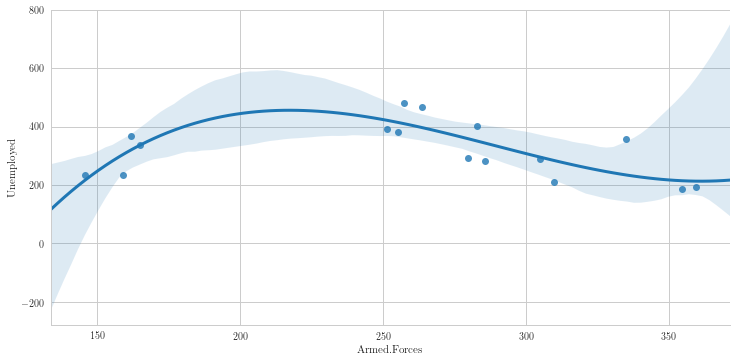

In [141]:
sns.lmplot("Armed.Forces", "Unemployed", df, order=3, size=5.2,aspect=2);

### Example 2: Housing Data

The Boston housing data set provides records measurements of 13 attributes of housing markets around Boston, as well as the median price. We want to predict the price of a market given a set of attributes.



To start with we load and visualize the data.

In [142]:
from sklearn import datasets
boston = datasets.load_boston()
X_boston,y_boston = boston.data, boston.target
print('Shape of data: {} {}'.format(X_boston.shape, y_boston.shape))

Shape of data: (506, 13) (506,)


In [143]:
print('keys: {}'.format(boston.keys()))
print('feature names: {}'.format(boston.feature_names))
print(boston.DESCR)

keys: dict_keys(['data', 'target', 'feature_names', 'DESCR'])
feature names: ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - 

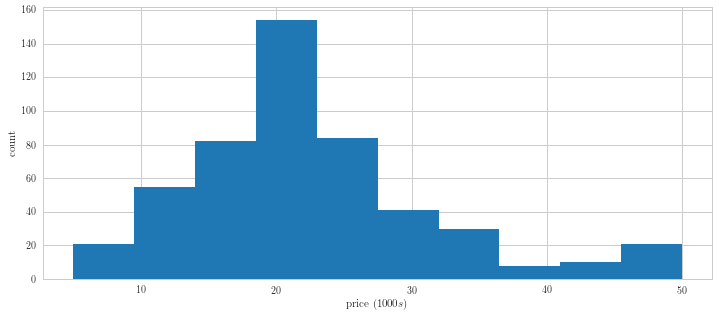

In [144]:
# Histogram of prices:
plt.hist(y_boston) 
plt.xlabel('price ($1000s)')
plt.ylabel('count')

We first consider the task of predicting median house values in the Boston area using as the predictor one of the attributes, for instance, LSTAT, defined as the "proportion of lower status of the population".
Seaborn visualization can be used to show this linear relationships easily:

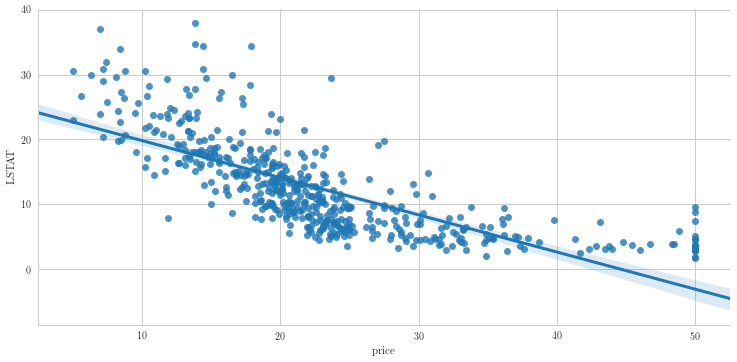

In [145]:
# Visualization of the relations between price and LSTAT
df_boston = pd.DataFrame(boston.data, columns=boston.feature_names)
df_boston['price'] = boston.target
sns.lmplot("price", "LSTAT", df_boston,size=5.2,aspect=2);


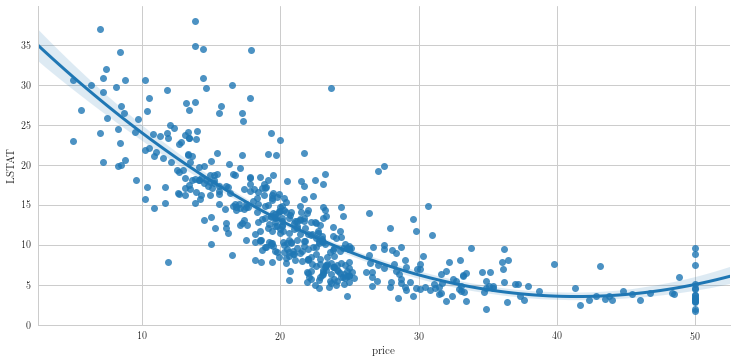

In [146]:
sns.lmplot("price", "LSTAT", df_boston, order=2,size=5.2,aspect=2);


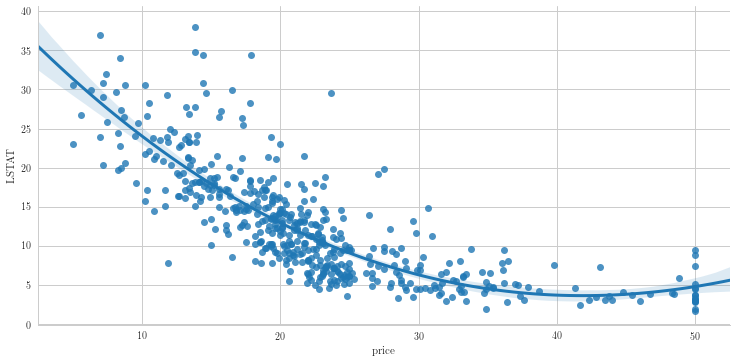

In [147]:
sns.lmplot("price", "LSTAT", df_boston, order=3,size=5.2,aspect=2);

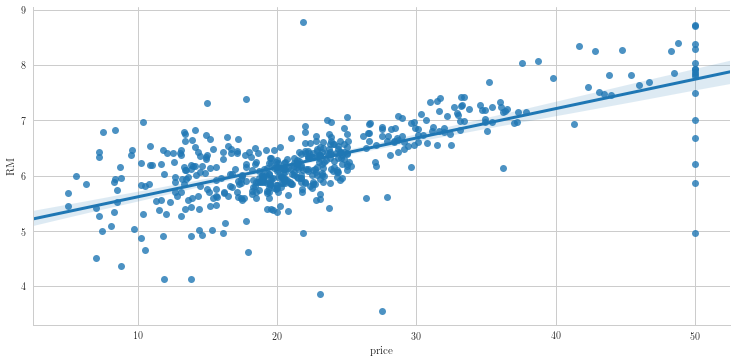

In [148]:
# Visualization of the relations between price and RM
sns.lmplot("price", "RM", df_boston,size=5.2,aspect=2);

## More Visualizations

### Heatmap

We can also use corr and heatmap functions for plotting a diagonal correlation matrix.

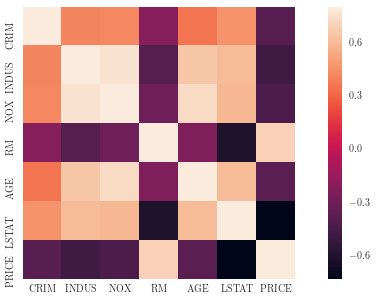

In [149]:
indexes=[0,2,4,5,6,12] # To plot just 7 of the 13 variables: PRICE, LSTAT, AGE, RM, NOX, INDUS, CRIM.
df2 = pd.DataFrame(boston.data[:,indexes], columns=boston.feature_names[indexes])
df2['PRICE'] = boston.target
corrmat = df2.corr()
# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=.8, square=True)

Using correlaton matrix heatmap we can observe that "RM" and "LSTAT" are the variables more correlated with "Price".

### Scatter plot

Let's explore multiple variables using scatter plot of Pandas. The scatter plot is a grid of plots of multiple varaibles one against the other, showing the relationship of each variable to the others.

For the sake of visualization, we choose 3 from the set of 13 variables:

In [150]:
print(boston.feature_names)
indexes=[5,6,12]
print(boston.feature_names[indexes])

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
['RM' 'AGE' 'LSTAT']


/Users/laura/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  after removing the cwd from sys.path.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c201610f0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1c1fec0080>]], dtype=object)

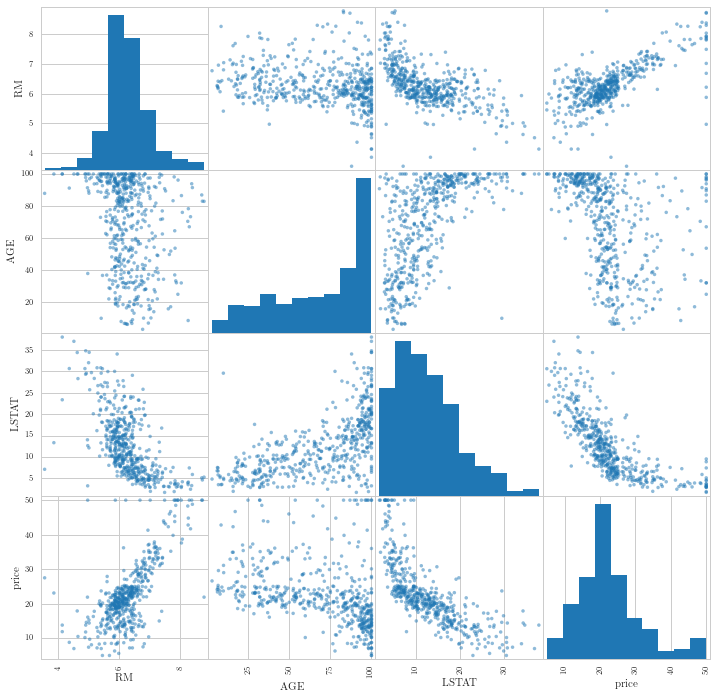

In [151]:
indexes=[5,6,12]
df2 = pd.DataFrame(boston.data[:,indexes], columns=boston.feature_names[indexes])
df2['price'] = boston.target
pd.scatter_matrix(df2, figsize=(12.0,12.0))  


## Predictions

Let's make predictions using Scikit-learn. 

Scikit-learn is a library that provides a variety of both supervised and unsupervised machine learning techniques.

Scikit-learn provides an object-oriented interface centered around the concept of an Estimator. 

The <code>Estimator.fit</code> method sets the state of the estimator based on the *training data*. Usually, the data is comprised of a two-dimensional numpy array $X$ of shape <code>(n_samples, n_predictors)</code> that holds the so-called feature matrix and a one-dimensional numpy array $\textbf{y}$ that holds the responses. Some estimators allow the user to control the fitting behavior. 



During the fitting process, the state of the estimator is stored in instance attributes that have a trailing underscore (``'_'``). For example, the coefficients of a ``LinearRegression`` estimator are stored in the attribute ``coef_``:

In [152]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
clf = LinearRegression() 
clf.fit ([[0, 1], [1, 1], [2, 1]], [0, 1, 2])  # Perform the fitting
clf.coef_

array([ 1.,  0.])

We can evaluate the model fitting by computing the mean squared error ($MSE$) and the coefficient of determination ($R^2$) of the model.
The coefficient $R^2$ is defined as $(1 - \textbf{u}/\textbf{v})$, where $\textbf{u}$ is the residual sum of squares $\sum (\textbf{y} - \hat{\textbf{y}})^2$ and $\textbf{v}$ is the regression sum of squares $\sum (\textbf{y} - \bar{\textbf{y}})^2$, where $\bar{\textbf{y}}$ is the mean.
The best possible score for $R^2$ is 1.0: lower values are worse.


We will split the data into training set and test set:

In [153]:
train_size = np.floor(X_boston.shape[0]/2)
int(train_size)

253

In [154]:
train_size = int(X_boston.shape[0]/2)
X_train = X_boston[:train_size]
X_test = X_boston[train_size:]
y_train = y_boston[:train_size]
y_test = y_boston[train_size:]
print('Train and test sizes {} {}'.format(X_train.shape, X_test.shape))
regr_boston = LinearRegression()
regr_boston.fit(X_train, y_train) 
print('Coeff and intercept: {} {}'.format(regr_boston.coef_, regr_boston.intercept_))
# Best possible score is 1.0, lower values are worse.
print('Training Score: {}'.format(regr_boston.score(X_train, y_train)))
print('Testing Score: {}'.format(regr_boston.score(X_test, y_test)))
print('Training MSE: {}'.format(np.mean((regr_boston.predict(X_train) - y_train)**2)))
print('Testing MSE: {}'.format(np.mean((regr_boston.predict(X_test) - y_test)**2)))

Train and test sizes (253, 13) (253, 13)
Coeff and intercept: [ 1.20133313  0.02449686  0.00999508  0.42548672 -8.44272332  8.87767164
 -0.04850422 -1.11980855  0.20377571 -0.01597724 -0.65974775  0.01777057
 -0.11480104] -10.017430582944375
Training Score: 0.8557827200735684
Testing Score: -2.2442020267426974
Training MSE: 9.987517325463743
Testing MSE: 302.6409113296388


We can see that all the coefficients obtained are different from zero, meaning that no variable is discarded.
Next, we try to build a sparse model to predict the price using the most important factors and discarding the non-informative ones. To do this, we can create a LASSO regressor, forcing zero coefficients (see below).

<div class="alert alert-success" style = "border-radius:10px;border-width:3px;border-color:darkgreen;font-family:Verdana,sans-serif;font-size:16px;">
**EXERCISE 1: Climate Change and Sea Ice Extent**<p>

We want to answer the question: Has there been a decrease in the amount of ice in the last years?

For that we will use the sea ice extent measurements from the [National Snow & Ice Data Center](https://nsidc.org/data/seaice\_index/archives.html).<p>

We perform the following processing steps:

</li>
<ol>
<ul>
</ul>
<li> We must read and clean the data.
<li> To compute the tendency for a given interval of time (month), we need to normalize the data.
<li> This values can be plotted for the entire time series or for particular months. 
<li> We can also compute the trend as a simple linear regression (OLS) and quantitatively evaluate it.
<li> We can also estimate the extent value for 2025.

</ol>
</div>

In [155]:
# Load the data and show the info and contents:
import pandas as pd
ice = pd.read_csv('files/ch06/SeaIce.txt',delim_whitespace=True)
print('shape: {}'.format(ice.shape))
ice.head() 

shape: (424, 6)


,year,mo,data_type,region,extent,area
0,1979,1,Goddard,N,15.54,12.33
1,1980,1,Goddard,N,14.96,11.85
2,1981,1,Goddard,N,15.03,11.82
3,1982,1,Goddard,N,15.26,12.11
4,1983,1,Goddard,N,15.10,11.92



To compute the anomaly for a given interval of time, we can compute the mean for that interval of time (using the period 1981 through 2010 for the mean extend), before data cleaning.

In [156]:
# Your code here

Visualize the data

## Sparse models

Often, in real problems, there are uninformative variables in the data which prevent proper modeling of the problem and thus, the building of a correct regression model. In such cases, a feature selection process is crucial to select only the informative features and discard non-informative ones. This can be achieved by sparse methods which use a penalization approach, such as *LASSO* (least absolute shrinkage and selection operator) to set some model coefficients to zero (thereby discarding those variables). Sparsity can be seen as an application of Occam’s razor: prefer simpler models to complex ones.


To improve the conditioning of the problem (uninformative variables, mitigate the curse of dimensionality, as a feature selection preprocessing, etc.), sometimes it is interesting to select only the informative features and set non-informative ones to 0. This penalization approach, called **Lasso**, can set some coefficients to zero. 

Such methods are called sparse methods, and sparsity can be seen as an application of Occam’s razor: prefer simpler models to complex ones.

Given the set of samples $(X,\textbf{y})$, the objetive is to minimize the SSE with a restriction:


$$ \textrm{$argmin$}_{\textbf{w}} \left( \frac{1}{2n}  || X \textbf{w} -  \textbf{y} ||^2_2 + \alpha || \textbf{w}||_1 \right)$$

where $||\textbf{w}||_1$ is the $\ell_1$-norm of the parameter vector.

### Geometric interpretation of regularization

The left panel shows L2 regularization (ridge regularization) and the right panel L1 regularization (LASSO regression). The ellipses indicate the distribution for no regularization. The blue lines show the constraints due to regularization (limiting $\theta^2$ for ridge regression and $|\theta|$ for LASSO regression). The corners of the L1 regularization create more opportunities for the solution to have zeros for some of the weights.


<center><img src="files/images/regularization_ridge_lasso.png"></center>


In [157]:
# Create a Lasso regressor
regr_lasso = linear_model.Lasso(alpha=.3)
regr_lasso.fit(X_train, y_train) 
print('Coeff and intercept: {} {}'.format(regr_lasso.coef_,  regr_lasso.intercept_))
print('Training Score: {}'.format(regr_lasso.score(X_train, y_train)))
print('Testing Score: {}'.format(regr_lasso.score(X_test, y_test)))
# Best possible score is 1.0, lower values are worse
# Are the coeficients now sparse?
# Is the score almost the same?
print('Training MSE: {}'.format(np.mean((regr_lasso.predict(X_train) - y_train)**2)))
print('Test MSE: {}'.format(np.mean((regr_lasso.predict(X_test) - y_test)**2)))

Coeff and intercept: [ 0.          0.01996512 -0.          0.         -0.          7.69894744
 -0.03444803 -0.79380636  0.0735163  -0.0143421  -0.66768539  0.01547437
 -0.22181817] -6.183241836148394
Training Score: 0.8449992039829642
Testing Score: 0.501127529021216
Training MSE: 10.73431100954422
Test MSE: 46.538168094875665


It can now be seen that the result of the model fitting for a set of sparse coefficients is much better than before (using all the variables), with the score increasing from -2.24 to 0.5. This demonstrates that four of the initial variables are not important for the prediction and in fact they confuse the regressor.

In [158]:
print(boston.data.shape)
print(boston.target.shape)
print(boston.feature_names)
print(np.max(boston.target), np.min(boston.target), np.mean(boston.target))

(506, 13)
(506,)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
50.0 5.0 22.5328063241


In [159]:
indexes_non_selected=[0,2,3,4]
print('Non important variable: {}'.format(boston.feature_names[indexes_non_selected]))
most_important_index=[5]
print('Most important variable: {}'.format(boston.feature_names[most_important_index]))

Non important variable: ['CRIM' 'INDUS' 'CHAS' 'NOX']
Most important variable: ['RM']


In [160]:
ind=np.argsort(np.abs(regr_lasso.coef_))
print('Order variable (from less to more important): {}'.format(boston.feature_names[ind]))

Order variable (from less to more important): ['CRIM' 'INDUS' 'CHAS' 'NOX' 'TAX' 'B' 'ZN' 'AGE' 'RAD' 'LSTAT' 'PTRATIO'
 'DIS' 'RM']


We can select the most important features with sklearn:

In [161]:
import sklearn.feature_selection as fs 
selector = fs.SelectKBest(score_func=fs.f_regression,k=5)
X_new = selector.fit(X_train,y_train)
print('Selected features: {}'.format(zip(selector.get_support(),boston.feature_names))) # Show the selected features

Selected features: <zip object at 0x1c2115f1c8>


The set of selected features is now different, since the criterion has changed. However, three of the most important features are among them: 'RM', 'PTRATIO' and 'LSTAT'.


Let's evaluate the predictions.

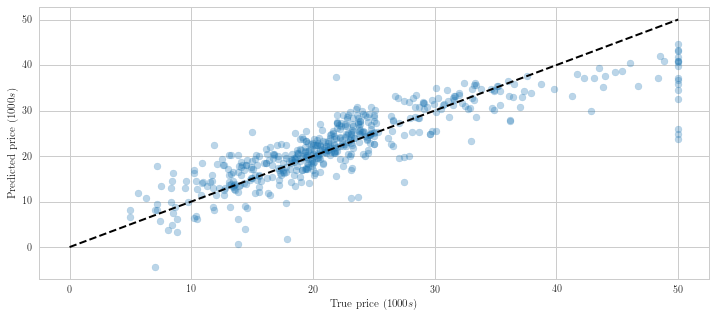

In [162]:
# Visualization of target and predicted responses
clf = LinearRegression()
clf.fit(boston.data, boston.target)
predicted = clf.predict(boston.data)
plt.scatter(boston.target, predicted, alpha=0.3)
plt.plot([0, 50], [0, 50], '--k')
plt.axis('tight')
plt.xlabel('True price ($1000s)')
plt.ylabel('Predicted price ($1000s)')


Model evaluation:

In [163]:
clf.score(boston.data, boston.target)  # Best possible score is 1.0, lower values are worse.

0.7406077428649428

In [164]:
# Score using a single feature
regr_feat1 = LinearRegression()
for i in np.arange(13):
    feat1=X_train[:,i:i+1]
    regr_feat1.fit(feat1, y_train)    
    print('Feature: {}'.format(boston.feature_names[i]))
    print('Score: {}'.format(regr_feat1.score(feat1, y_train)))

Feature: CRIM
Score: 0.05024843836202264
Feature: ZN
Score: 0.10206594240694711
Feature: INDUS
Score: 0.13068434569181497
Feature: CHAS
Score: 0.00018610373661331892
Feature: NOX
Score: 0.11130139266941119
Feature: RM
Score: 0.7699004053318655
Feature: AGE
Score: 0.11300215206715913
Feature: DIS
Score: 0.018087821597697507
Feature: RAD
Score: 0.0015003535946076507
Feature: TAX
Score: 0.05512205417475469
Feature: PTRATIO
Score: 0.13721073435814335
Feature: B
Score: 0.0463878641534512
Feature: LSTAT
Score: 0.5035503901281464


### Predict and Transformer
Estimators that can generate predictions provide a ``Estimator.predict`` method. 
In the case of regression, ``Estimator.predict`` will return the predicted regression values, $\hat{\textbf{y}}$. 

Moreover, there is a special type of ``Estimator`` called ``Transformer`` which transforms the input data -- e.g. selects a subset of the features or extracts new features based on the original ones.

One transformer that we will use here is ``sklearn.preprocessing.StandardScaler``. This transformer centers each predictor in ``X`` to have zero mean and unit variance:

Sometimes Standarization is useful:

In [165]:
y_train.shape

(253,)

In [166]:
from sklearn.preprocessing import StandardScaler
# Create the transformer StandardScaler for data and target
scalerX = StandardScaler().fit(X_train)
y_train1 = np.expand_dims(y_train, axis=1)
scalery = StandardScaler().fit(y_train1)

print("\nBefore transformation:")
print(np.max(y_train), np.min(y_train1), np.mean(y_train))

# Normalization of train and test data using mean and variance of the training
X_train = scalerX.transform(X_train)
y_train = scalery.transform(y_train1)
X_test = scalerX.transform(X_test)
y_test1 = np.expand_dims(y_test, axis=1)
y_test = scalery.transform(y_test1)

print("\nAfter transformation:")
print(np.max(y_train1), np.min(y_train1), np.mean(y_train1))


Before transformation:
50.0 11.8 24.3075098814

After transformation:
50.0 11.8 24.3075098814


## Statistical evaluation

The ``statsmodels`` package provides several different classes that provide different options for linear regression. Getting started with linear regression is quite straightforward with the OLS module.

We can perform the regression of the predictor on the response, using the ``sm.OLS`` class and its initialization ``OLS(y, X)`` method. This method takes as an input two array-like objects: $X$ and $\textbf{y}$. In general, $X$ will either be a numpy array or a pandas data frame with shape ``(n, p)`` where $n$ is the number of data points and $p$ is the number of predictors. $\textbf{y}$ is either a one-dimensional numpy array or a pandas series of length $n$.

In [167]:
import statsmodels.api as sm
X2 = X_boston[:,12] # Let's use column 12 (LSTAT) to perform a regression:
X12 = sm.add_constant(X2)  # Adds a constant term to the predictor
est = sm.OLS(y_boston, X2) # Creates an object OLS estimator
est = est.fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.449
Model:                            OLS   Adj. R-squared:                  0.448
Method:                 Least Squares   F-statistic:                     410.9
Date:                Fri, 20 Oct 2017   Prob (F-statistic):           2.71e-67
Time:                        15:29:18   Log-Likelihood:                -2182.4
No. Observations:                 506   AIC:                             4367.
Df Residuals:                     505   BIC:                             4371.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.1221      0.055     20.271      0.000       1.013       1.231
==============================================================================
Omnibus:                        1.113   Durbin-Watson:                   0.369
Prob(Omnibus):                  0.573   Jarque-Bera (JB):                1.051
Skew:                           0.112   Prob(JB):                        0.591
Kurtosis:                       3.009   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<div class="alert alert-success" style = "border-radius:10px;border-width:3px;border-color:darkgreen;font-family:Verdana,sans-serif;font-size:16px;">
**EXERCISE 2: Advertising dataset**<p>


In the following example we will use the advertising dataset which consists of the sales of products and their advertising budget in three different media TV, radio, newspaper.<p>

Dataset from the book: "An Introduction to Statistical Learning with Applications in R”. Gareth James, Daniela Witten, Trevor Hastie and Robert Tibshirani.<p>


</div>

In [168]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
df_adv = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
X = df_adv[['TV', 'radio']]
y = df_adv['sales']
df_adv.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


We can show this for two predictor variables in a three dimensional plot. 

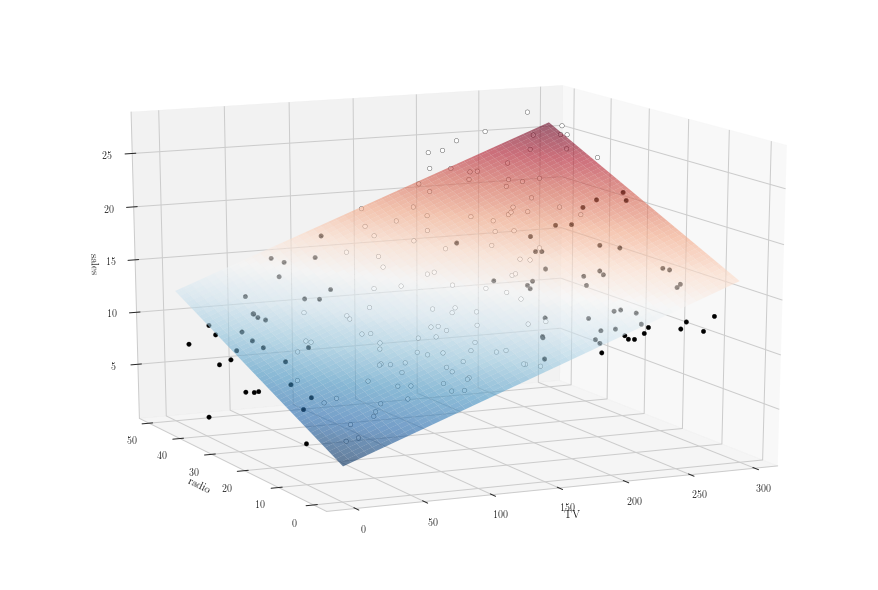

In [169]:
from mpl_toolkits.mplot3d import Axes3D

## fit a OLS model with intercept on TV and Radio
X = sm.add_constant(X)
est = sm.OLS(y, X).fit()

## Create the 3d plot 
xx1, xx2 = np.meshgrid(np.linspace(X.TV.min(), X.TV.max(), 100), 
                       np.linspace(X.radio.min(), X.radio.max(), 100))
# plot the hyperplane by evaluating the parameters on the grid
Z = est.params[0] + est.params[1] * xx1 + est.params[2] * xx2

# create matplotlib 3d axes
fig = plt.figure(figsize=(12, 8))
ax = Axes3D(fig, azim=-115, elev=15) # azim, stores the azimuth angle in the x,y plane; elev, stores the elevation angle in the z plane 

# plot hyperplane
surf = ax.plot_surface(xx1, xx2, Z, cmap=plt.cm.RdBu_r, alpha=0.6, linewidth=0) # cmap, a colormap for the surface patches.
# linewidth=0, allows not drawing lines on the surface

# plot data points - points over the HP are white, points below are black
resid = y - est.predict(X)
ax.scatter(X[resid >= 0].TV, X[resid >= 0].radio, y[resid >= 0], color='black', alpha=1.0, facecolor='white')
ax.scatter(X[resid < 0].TV, X[resid < 0].radio, y[resid < 0], color='black', alpha=1.0)

# set axis labels
ax.set_xlabel('TV')
ax.set_ylabel('radio')
ax.set_zlabel('sales')
plt.figure()

Explore relations using scatter plot and extract some conclusions

In [170]:
# your code here


Your conclusions here:


<div class="alert alert-success" style = "border-radius:10px;border-width:3px;border-color:darkgreen;font-family:Verdana,sans-serif;font-size:16px;">
**EXERCISE 3** Diabetes <p>

The diabetes dataset (from scikit-learn) consists of 10 physiological variables (age, sex, weight, blood pressure) measure on 442 patients, and an indication of disease progression after one year:

</div>

In [171]:
from sklearn import datasets
diabetes = datasets.load_diabetes()
X,y = diabetes.data, diabetes.target
print(X.shape, y.shape)

(442, 10) (442,)


Visualize the data using scatter plot (plt.scatter)

In [172]:
# Your code here

Divide in training and testing sets and evaluate the prediction (sklearn) with a simple and a multiple regression model.

In [173]:
# Your code here

Divide in training and testing sets and evaluate the prediction (sklearn) without and with LASSO regularization.

In [174]:
# Your code here

## Logistic Regresion (Scikit-learn)

**Logistic regression** or logit regression is a type of probabilistic statistical classification model. It is also used to predict a binary response from a binary predictor, used for predicting the outcome of a categorical dependent variable (i.e., a class label) based on one or more predictor variables (features). 

(Source: *Wikipedia*)

The logistic function is:

$$ f(x) = \frac{1}{1+e^{- \lambda x}}$$

The logistic function is useful because it can take an input with any value from negative infinity to positive infinity, whereas the output  is confined to values between 0 and 1 and hence is interpretable as a probability.

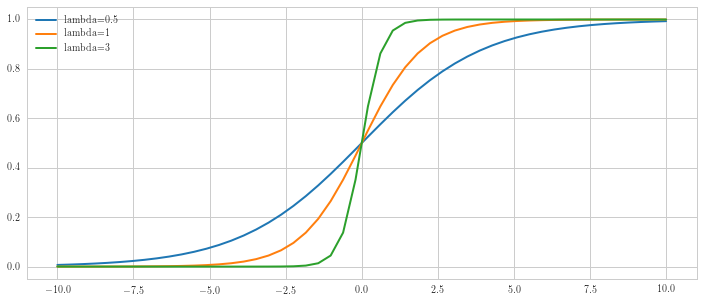

In [175]:
def logist(x,l):
    return 1/(1+np.exp(-l*x))

x = np.linspace(-10,10) # 50 points equally spaced from -10 to 10
t = logist(x,0.5)
y = logist(x,1)
z = logist(x,3)
plt.plot(x,t, label='lambda=0.5')
plt.plot(x,y, label='lambda=1')
plt.plot(x,z, label='lambda=3')
plt.legend(loc='upper left')


/Users/laura/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp


(-4, 4)

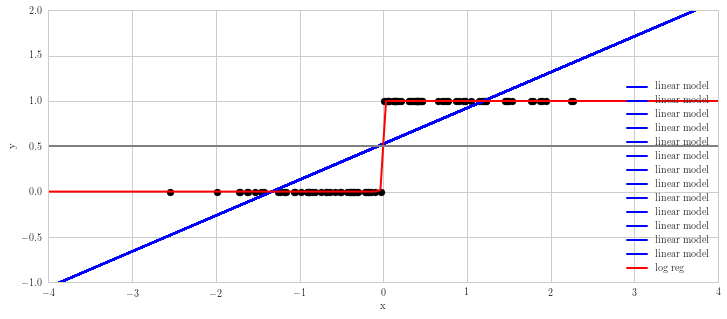

In [176]:
from sklearn import linear_model

xmin, xmax = -10, 10
n_samples = 100
np.random.seed(0)
X = np.random.normal(size=n_samples) # Creates 100 random numbers from a normal distribution.
y = (X > 0).astype(np.float) 
X = X[:, np.newaxis] 

# Linear Regression:
ols = linear_model.LinearRegression()
ols.fit(X, y)
plt.plot(X_test, ols.coef_ * X_test + ols.intercept_, color='blue', linewidth=2, label='linear model')


# Logistic Regression:
clf = linear_model.LogisticRegression(C=1e5)
clf.fit(X, y)

def lr_model(x):
    return 1 / (1 + np.exp(-x))

X_test = np.linspace(-10, 10, 300)
loss = lr_model(X_test * clf.coef_ + clf.intercept_).ravel() # in column array
plt.plot(X_test, loss, color='red', linewidth=2, label='log reg')

plt.axhline(0.5, color='grey') # Plot horizontal axis in 0.5

plt.scatter(X, y, color='black')

plt.legend(loc='lower right')
plt.ylabel('y')
plt.xlabel('x')

plt.ylim(-1, 2)
plt.xlim(-4, 4)



<div class="alert alert-success" style = "border-radius:10px;border-width:3px;border-color:darkgreen;font-family:Verdana,sans-serif;font-size:16px;">
**EXERCISE 4: Winning or Losing Football Team** <p>

We want to predict victory or defeat in a football match when we are given the number of goals a team scores.
To do this we consider the set of results of the football matches from the Spanish league and we build a classification model with it. <p>

We follow the steps:
<ul>
    <li> Read this file in a pandas DataFrame: http://www.football-data.co.uk/mmz4281/1213/SP1.csv
    <li> Select these columns in a new DataFrame: 'HomeTeam','AwayTeam', 'FTHG', 'FTAG', 'FTR'. (FTHG: Home team goals, FTAG: Away team goals, FTR: H=Home Win, D=Draw, A=Away Win)
    <li> Visualize a scatter plot of FTHG versus FTAG.
    <li> Built a $X$ 1-d predictor with all scores and a $y$ binary variable indicating win or loss.
    <li> Compute and visualize a logistic regression. 
    <li> Which is the cut value?

</div>

In [177]:
import pylab as pl

# Season 2012/2013
file = 'files/ch06/SP1.csv' # file = 'http://www.football-data.co.uk/mmz4281/1213/SP1.csv'
footballData = pd.read_csv(file)
s = footballData[['HomeTeam','AwayTeam', 'FTHG', 'FTAG', 'FTR']]

In [178]:
s.head() # (H=Home Win, D=Draw, A=Away Win)

,HomeTeam,AwayTeam,FTHG,FTAG,FTR
0,Celta,Malaga,0,1,A
1,Mallorca,Espanol,2,1,H
2,Sevilla,Getafe,2,1,H
3,Ath Bilbao,Betis,3,5,A
4,Barcelona,Sociedad,5,1,H


Can we predict if we have a win or loss if we are given a score?

To answer this question, we can follow the steps:
* Visualization with scatter plot the number of goals
* Create the data and target: concatenate the number of goals of the winner and the number of goals of the losser
* Plot the 2-dimensional data
* Fitting of a Logistic Regression and prediction using the model
* Estimate which is the cut off value.

In [179]:
# Your code goes here